# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [9]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue'})
import datetime as dt
from sklearn.metrics import mean_squared_error as MSE
import math
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [10]:
#loading the train data
df_train=pd.read_csv('df_train.csv')
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [11]:
#copying the train data for pipeline preprocessing
df_train_pipe = df_train.drop('Unnamed: 0', axis=1).copy()

Copying the train dataset into a seperate variable for later use in a preprocessing pipeline for our model.

In [12]:
#loading the test data
df_test=pd.read_csv('df_test.csv')
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [13]:
#copying the train data for pipeline preprocessing
df_test_pipe = df_test.drop('Unnamed: 0', axis=1).copy()

Copying the train dataset into a seperate variable for later use in a preprocessing pipeline for our model.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [14]:
# look at data statistics
df_train.shape

(8763, 49)

In [15]:
#to see the any releveant statistic from the test data frame.
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [16]:
#to check for the train dataframes datatypes
df_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [17]:
df_test.shape

(2920, 48)

In [18]:
#to see the any releveant statistic from the test data frame.
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [19]:
#to check the dataype
df_test.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h            int64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h          int64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

It looks like the data types of the both the train and test data is not consistent, we have objects, floats and intergers. Knowing that datatypes "object" are not often useful in regression models, we will have to look into them later on the data engineering phase.

Checking for outliers in the temperature category, with Valencia as the representative.

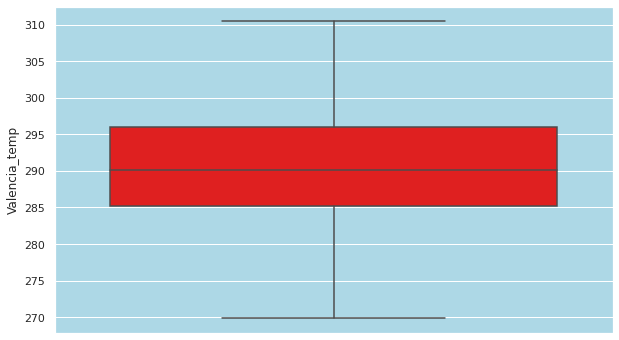

In [20]:
# plot relevant feature interactions
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=df_train['Valencia_temp'], color='red', ax=ax)

The temperatures of the dataset are generally centred around the same values, checking one as representative will suffice. From the above figure, there are no outliers in the temperatures of the dataset.

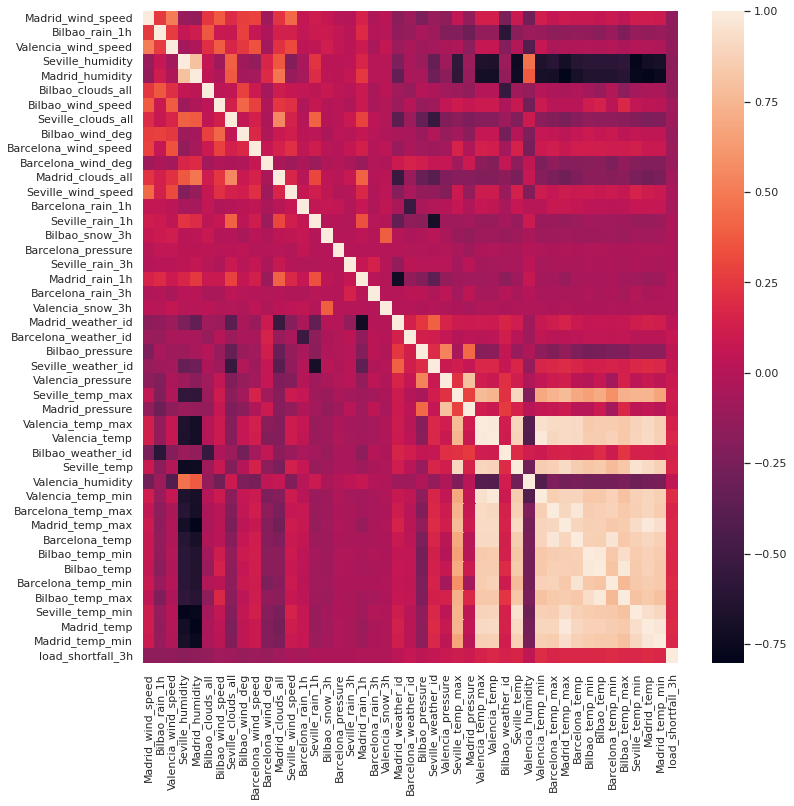

In [21]:
# evaluate correlation
corr = df_train.drop('Unnamed: 0', axis=1).corr()
#plotting correlation heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax)

It seems Humidity and heat have a negative correlation to each other.as it would be safe to assume since the higher the temparature the less water in the air is expected.

Text(0.5, 1.0, 'Multicollinearity Between Independent Variables')

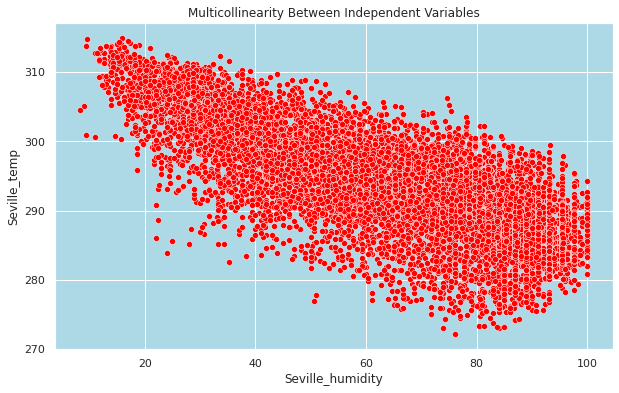

In [22]:
#Checking for multicollinearity between humidity and temp
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Seville_humidity', y='Seville_temp', data=df_train, color='red', ax=ax)
ax.set_title('Multicollinearity Between Independent Variables')

In [23]:
# have a look at feature distributions

having attempted to plot other key features, it came up with multiple errors. This then lead us to believe that our data has some invalid columns or empty columns. to fix this we went on to the data engineering phase of our project.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [24]:
# remove missing values/ features
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [25]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

from above we see Valencia_pressure has null, to further explore firstly the df_train and then the df_test Valencia_pressure null.

In [26]:
df_train[['Valencia_pressure']]

,Valencia_pressure
0,1002.666667
1,1004.333333
2,1005.333333
3,1009.000000
4,NaN
...,...
8758,NaN
8759,1021.000000
8760,1009.666667
8761,1020.000000


In [27]:
df_test[['Valencia_pressure']]

,Valencia_pressure
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2915,NaN
2916,NaN
2917,NaN
2918,NaN


knowing that pressure remains more or less constant through time. we can impute the mode of the data set for both the test and train data.

In [28]:
df_train['Valencia_pressure']=df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mode()[0])
df_train[['Valencia_pressure']]

,Valencia_pressure
0,1002.666667
1,1004.333333
2,1005.333333
3,1009.000000
4,1018.000000
...,...
8758,1018.000000
8759,1021.000000
8760,1009.666667
8761,1020.000000


In [29]:
df_test['Valencia_pressure']=df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])
df_test[['Valencia_pressure']]

,Valencia_pressure
0,1016.0
1,1016.0
2,1016.0
3,1016.0
4,1016.0
...,...
2915,1016.0
2916,1016.0
2917,1016.0
2918,1016.0


In [30]:
##we need to explore what information is contained and conveyed on 'Unnamed:0 '
df_train[['Unnamed: 0']]

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
8758,8758
8759,8759
8760,8760
8761,8761


In [31]:
#it would seem it is the same as the id column. so we can drop it for both train and test dataset.
df_test=df_test.drop('Unnamed: 0', axis=1)
df_train= df_train.drop('Unnamed: 0', axis=1)

There are some columns of worthy mention. the columns depicting the minimum and maximum temparature can be removed. This is because we have the avarage temperatures from each city in the data. keeping these columns could lead to out models being inacurate.

In [32]:
df_train= df_train.drop(df_train.columns[df_train.columns.str.endswith('_min')], axis=1)

In [33]:
df_train = df_train.drop(df_train.columns[df_train.columns.str.endswith('_max')], axis=1)

And to do the same for the test data

In [34]:
df_test= df_test.drop(df_test.columns[df_test.columns.str.endswith('_min')], axis=1)

In [35]:
df_test = df_test.drop(df_test.columns[df_test.columns.str.endswith('_max')], axis=1)

having done this, we noted a few data types that are objects. For the sake of the models we are going to use later. we will have to look into these columns and see if we can make any changes to them. first and foremost, we need to have column "time" to be in a format that is useable for any and all later functions.

In [36]:
df_train['time'] = pd.to_datetime(df_train['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [37]:
df_test['time'] = pd.to_datetime(df_test['time'], format='%Y-%m-%d %H:%M:%S.%f')

to go one step further we can make this into columns that can enrich us with much needed information. breaking into the day, month, year column. which will now serve to shine more light on the weather patterns that we seek to exploit.

In [38]:
df_train['hour'] = df_train['time'].dt.hour
df_train['times'] = df_train['time'].dt.time
df_train['dayofweek'] = df_train['time'].dt.dayofweek
df_train['day'] = df_train['time'].dt.day
df_train['month'] = df_train['time'].dt.month
df_train['year'] = df_train['time'].dt.year
df_train[['time','times','hour', 'dayofweek','day', 'month', 'year', 'load_shortfall_3h']].head(10)

,time,times,hour,dayofweek,day,month,year,load_shortfall_3h
0,2015-01-01 03:00:00,03:00:00,3,3,1,1,2015,6715.666667
1,2015-01-01 06:00:00,06:00:00,6,3,1,1,2015,4171.666667
2,2015-01-01 09:00:00,09:00:00,9,3,1,1,2015,4274.666667
3,2015-01-01 12:00:00,12:00:00,12,3,1,1,2015,5075.666667
4,2015-01-01 15:00:00,15:00:00,15,3,1,1,2015,6620.666667
5,2015-01-01 18:00:00,18:00:00,18,3,1,1,2015,6842.000000
6,2015-01-01 21:00:00,21:00:00,21,3,1,1,2015,10760.333333
7,2015-01-02 00:00:00,00:00:00,0,4,2,1,2015,10866.000000
8,2015-01-02 03:00:00,03:00:00,3,4,2,1,2015,-1850.333333
9,2015-01-02 06:00:00,06:00:00,6,4,2,1,2015,-4002.333333


Text(0.5, 1.0, 'Load Shortfall in 3hour Intervals')

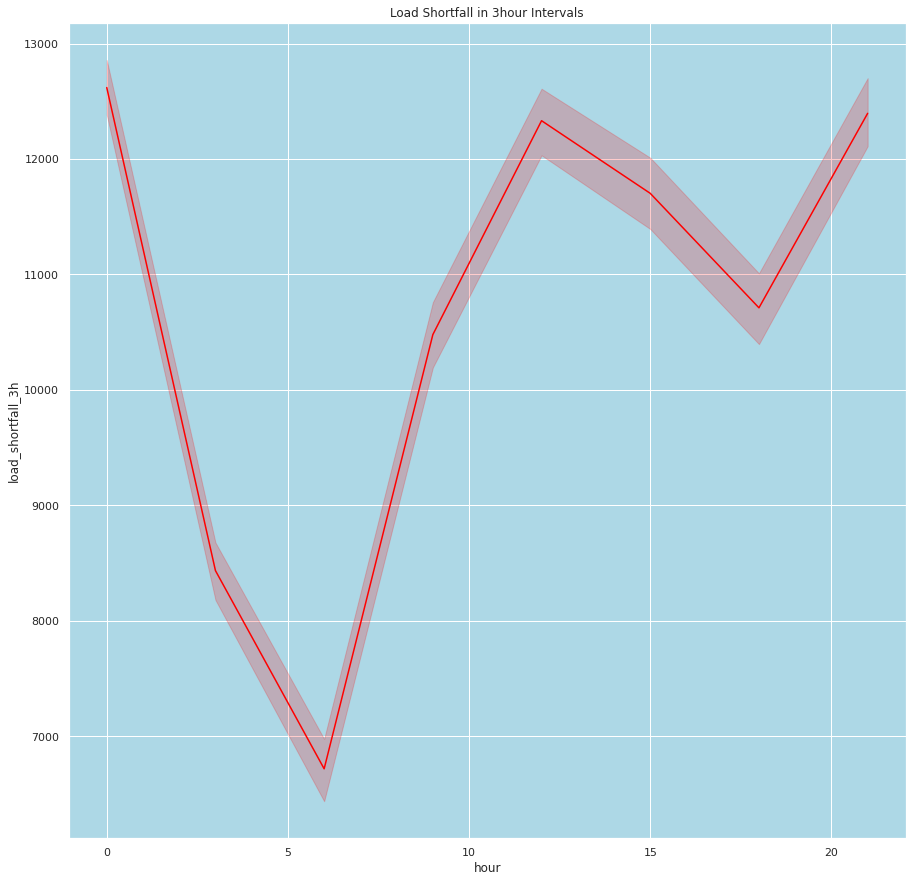

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
sns.lineplot(x='hour', y='load_shortfall_3h', data=df_train, color='red', ax=ax)
ax.set_title('Load Shortfall in 3hour Intervals')

Text(0.5, 1.0, 'Load Shortfall in 3hour Intervals')

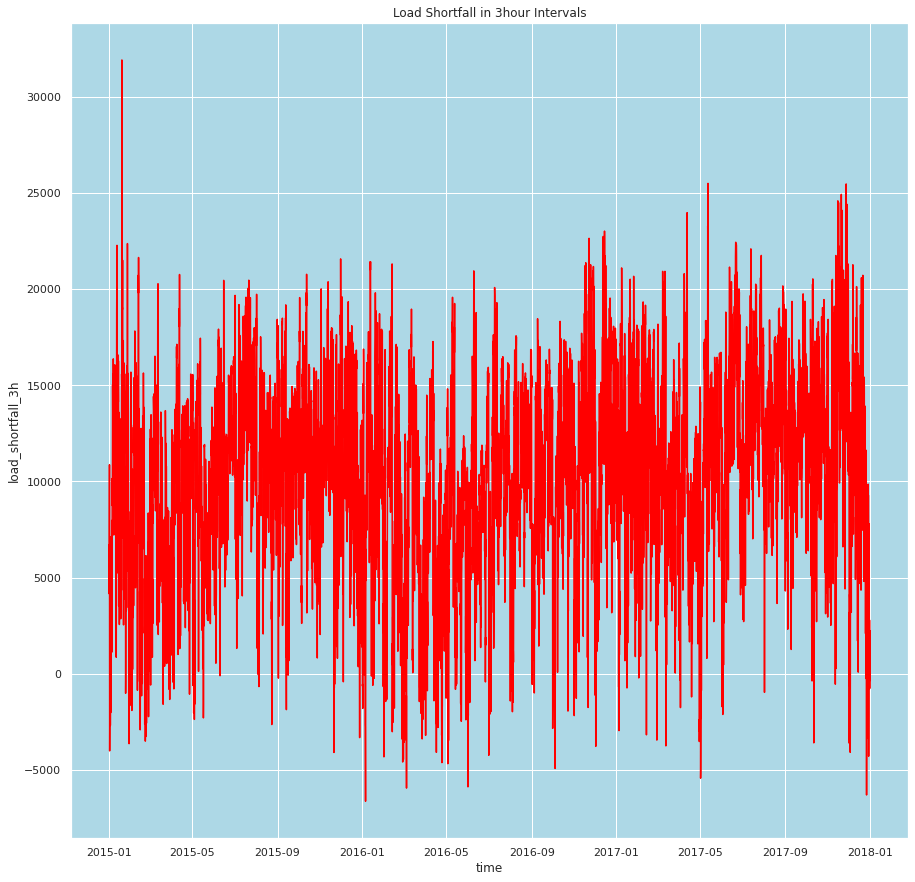

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
sns.lineplot(x='time', y='load_shortfall_3h', data=df_train, color='red', ax=ax)
ax.set_title('Load Shortfall in 3hour Intervals')

In [41]:
df_test['day'] = df_test['time'].dt.day
df_test['month'] = df_test['time'].dt.month
df_test['year'] = df_test['time'].dt.year
df_test[['time', 'day', 'month', 'year']].head()

,time,day,month,year
0,2018-01-01 00:00:00,1,1,2018
1,2018-01-01 03:00:00,1,1,2018
2,2018-01-01 06:00:00,1,1,2018
3,2018-01-01 09:00:00,1,1,2018
4,2018-01-01 12:00:00,1,1,2018


Now moving onto the other object datatypes. From above we noted the following columns to be of object datatype: "Valencia_wind_deg" and "Seville_pressure" from the train dataframe and from the test dataframe: "Valencia_wind_deg" and "Seville_pressure". This then leads us to believe that there could be a loading error or maybe inconsistencies. to explore this:

In [42]:
df_train[['Seville_pressure']].head()

,Seville_pressure
0,sp25
1,sp25
2,sp25
3,sp25
4,sp25


In [43]:
df_train[['Valencia_wind_deg']]

,Valencia_wind_deg
0,level_5
1,level_10
2,level_9
3,level_8
4,level_7
...,...
8758,level_6
8759,level_6
8760,level_9
8761,level_8


As seen above the data seems to be entered with nonnumeric characters. to fix this we can simply remove those characters instead of completely deleting those columns. this is justified because presssure remains constant during the year and we can see the values are more or less the same throughtout. As for wind degree it varies from season but it does remain the same  for a prolonged peiod.

In [44]:
df_train['Valencia_wind_deg']=df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg']=pd.to_numeric(df_train['Valencia_wind_deg'])
df_train[['Valencia_wind_deg']]

,Valencia_wind_deg
0,5
1,10
2,9
3,8
4,7
...,...
8758,6
8759,6
8760,9
8761,8


In [45]:
df_train['Seville_pressure']=df_train['Seville_pressure'].str.extract('(\d+)')
df_train['Seville_pressure']=pd.to_numeric(df_train['Seville_pressure'])
df_train['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [46]:
#and to do the same for the df_test.
df_test['Seville_pressure']=df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure']=pd.to_numeric(df_test['Seville_pressure'])
df_test[['Seville_pressure']]

,Seville_pressure
0,25
1,25
2,25
3,25
4,25
...,...
2915,24
2916,24
2917,23
2918,23


In [47]:
df_test['Valencia_wind_deg']=df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg']=pd.to_numeric(df_test['Valencia_wind_deg'])
df_test['Valencia_wind_deg']

0        8
1        8
2        7
3        7
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 2920, dtype: int64

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   int64         
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

We have columns with the cityname_weather_id. At first glance, they seem to serve no function indivually as they represent the weather in the city at a particular time. This information we already have in detail. We will explore the values they contain and if they are of no importance then we will remove them, this helps our models with removing all the noise.

In [49]:
df_train[['Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id']]

,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id
0,800.000000,800.0,800.000000,800.000000
1,800.000000,800.0,800.000000,800.000000
2,800.000000,800.0,800.000000,800.000000
3,800.000000,800.0,800.000000,800.000000
4,800.000000,800.0,800.000000,800.000000
...,...,...,...,...
8758,727.666667,801.0,769.333333,802.333333
8759,762.000000,801.0,803.000000,801.333333
8760,702.333333,801.0,801.666667,601.000000
8761,500.000000,800.0,802.333333,634.166667


In [50]:
#dropping the columns seems to be safer.
df_train = df_train.drop(df_train.columns[df_train.columns.str.endswith('_id')], axis=1)

In [51]:
#doing the same for the test data
df_test = df_test.drop(df_test.columns[df_test.columns.str.endswith('_id')], axis=1)

Having taken a closer look, we see that there is a cityname_humidity column. This column can also also be removed from the data because firstly, it negatively correlates with temparature. And also we have more useful information in the form of rainfall.

In [52]:
df_train = df_train.drop(df_train.columns[df_train.columns.str.endswith('_humidity')], axis=1)

In [53]:
df_test = df_test.drop(df_test.columns[df_test.columns.str.endswith('_humidity')], axis=1)

Now with the datatypes taken care of we can plot more detailed features. for instance the rainfall patterns rain that lasted an hour or less. With these patterns we can draw a generalised inference of which months are the wettest for Spain

In [54]:
df_train['avg_rain'] = df_train[['Barcelona_rain_1h', 'Barcelona_rain_3h', 'Bilbao_rain_1h', 'Madrid_rain_1h', 'Seville_rain_1h', 'Seville_rain_3h']].sum(numeric_only=True, axis=1) / 6

In [55]:
df_train[['avg_rain']].head()

,avg_rain
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [56]:
df_train[['avg_rain']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   avg_rain  8763 non-null   float64
dtypes: float64(1)
memory usage: 68.6 KB


Text(0.5, 1.0, 'Avg Rainfall in Spain')

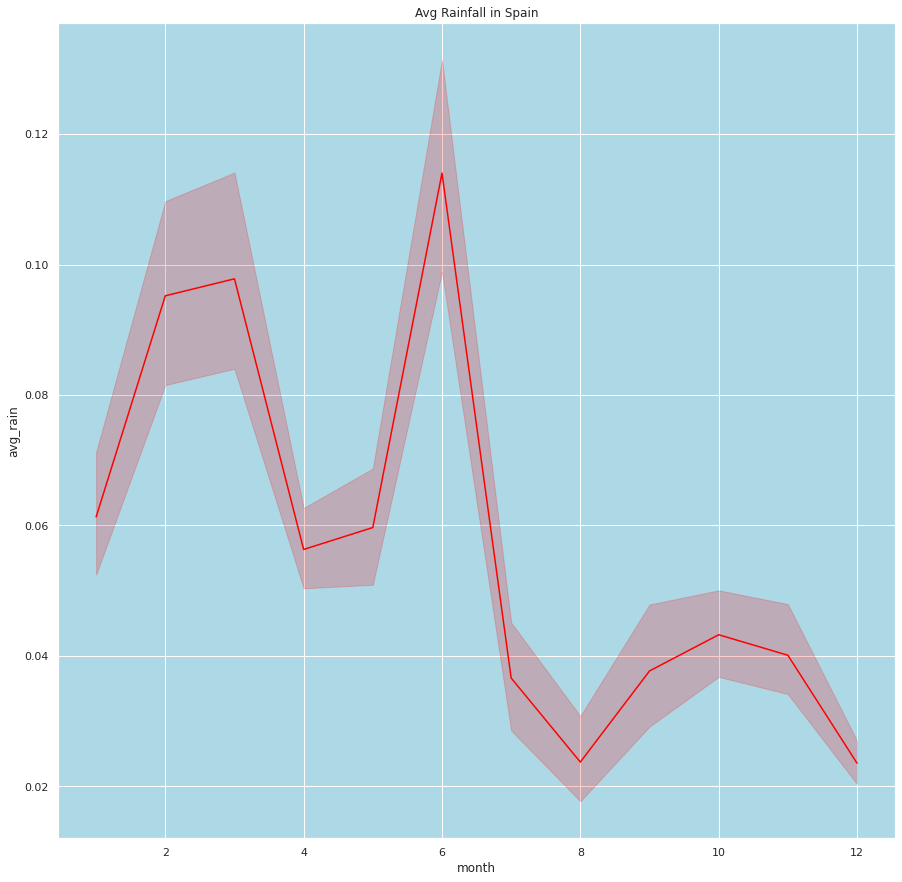

In [57]:
# create new features
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.lineplot(x='month', y='avg_rain', data=df_train, ax=ax, color='red')
ax.set_title('Avg Rainfall in Spain')

We can also try to see which months are the windiest in the different cities so as to see the viability of having wind turbines for windmills

In [58]:
df_train = df_train.drop('avg_rain', axis=1)

In [59]:
df_train['avg_wind_speed'] = df_train[['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed']].sum(numeric_only=True, axis=1) / 5

Text(0.5, 1.0, 'Avg Wind Speed in Spain')

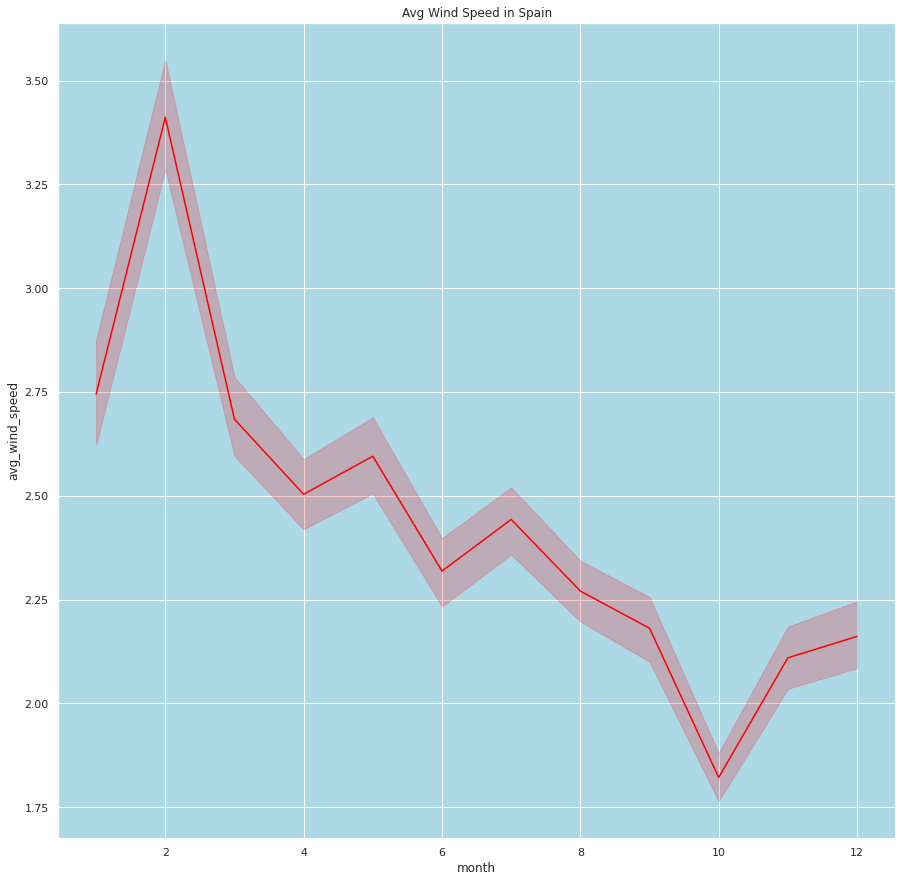

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.lineplot(x='month', y='avg_wind_speed', data=df_train, ax=ax, color='red')
ax.set_title('Avg Wind Speed in Spain')

We would not be exploring alterantive energy sources if we are not going to have a look at solar energy. Now we do not have the data for the days when it is most sunny. but we do have temparature data. Which we can use to see that which months are the hottest inferring to a degree the months with the most sunlight.

In [61]:
df_train = df_train.drop('avg_wind_speed', axis=1)

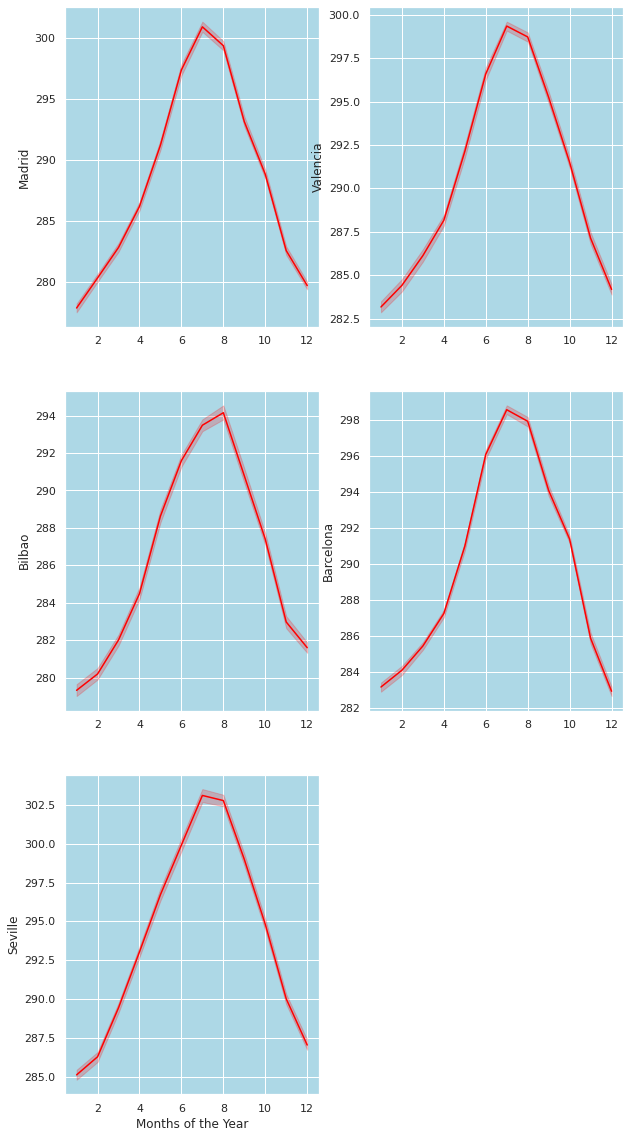

In [62]:
fig, ax = plt.subplots(3,2,figsize=(10,20))
ax[0,0]= sns.lineplot(x='month', y='Madrid_temp', data=df_train, ax=ax[0,0], color='red')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Madrid')
ax[0,1]= sns.lineplot(x='month', y='Valencia_temp', data=df_train, ax=ax[0,1], color='red')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Valencia')
ax[1,0]= sns.lineplot(x='month', y='Bilbao_temp', data=df_train, ax=ax[1,0], color='red')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Bilbao')
ax[1,1]= sns.lineplot(x='month', y='Barcelona_temp', data=df_train, ax=ax[1,1], color='red')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('Barcelona')
ax[2,0]= sns.lineplot(x='month', y='Seville_temp', data=df_train, ax=ax[2,0], color='red')
ax[2,0].set_xlabel('Months of the Year')
ax[2,0].set_ylabel('Seville')
ax[2,1].set_visible(False)

For more optimisation we can convert all the datatypes to be the same, this way we reduce the chances of our models overfitting and giving wrong predictions. The data types which have been converted above and all those which indicated to be int64 can be converted to floats as they are the most dominant datatype.

In [63]:
df_train['avg_cloud'] = df_train[['Bilbao_clouds_all', 'Madrid_clouds_all', 'Seville_clouds_all']].sum(numeric_only=True, axis=1)

Text(0.5, 1.0, 'Avg Cloud Cover in Spain')

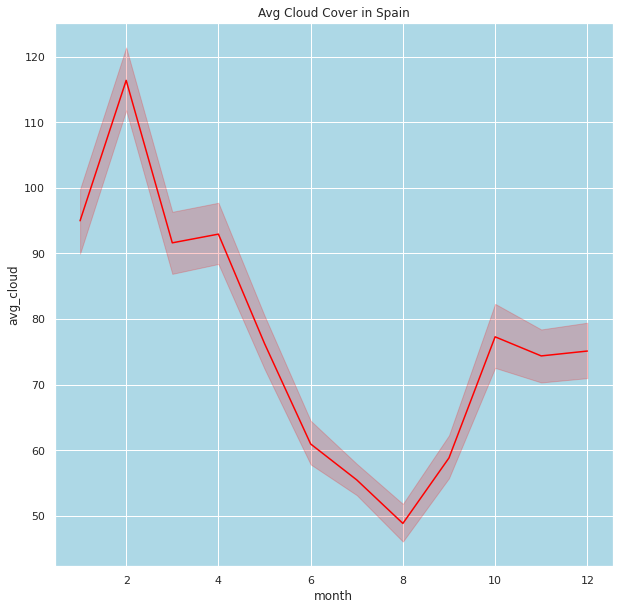

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(x='month', y='avg_cloud', data=df_train, ax=ax, color='red')
ax.set_title('Avg Cloud Cover in Spain')

In [65]:
df_train = df_train.drop('avg_cloud', axis=1)

In [66]:
#for the train data we need to convert Valencia_wind_deg and Seville_pressure
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].astype(float)
df_train['Seville_pressure'] = df_train['Seville_pressure'].astype(float)
df_train['Bilbao_snow_3h'] = df_train['Bilbao_snow_3h'].astype(float)
df_train['Valencia_snow_3h'] = df_train['Valencia_snow_3h'].astype(float)
df_train['year'] = df_train['year'].astype(int)
df_train['month'] = df_train['month'].astype(int)
df_train['day'] = df_train['day'].astype(int)

In [67]:
#for the test dataset 
df_test['Bilbao_snow_3h'] = df_test['Bilbao_snow_3h'].astype(float)
df_test['Valencia_snow_3h'] = df_test['Valencia_snow_3h'].astype(float)
df_test['year'] = df_test['year'].astype(int)
df_test['month'] = df_test['month'].astype(int)
df_test['day'] = df_test['day'].astype(int)
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].astype(float)
df_test['Seville_pressure'] = df_test['Seville_pressure'].astype(float)

Most importantly we can now visualise the load shortfall throughout the year. This can help us better understand the patterns of electricity shortage.

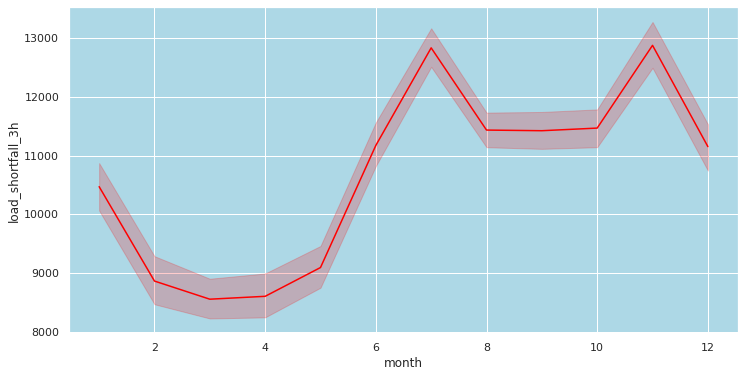

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='month', y='load_shortfall_3h', data=df_train, color='red', ax=ax)

Through the transition of Winter to Spring(Winter; February-March, Spring; March-June), The use of fosil fuels is extremely high almost matching that of the renewable sources. The peak of renewable sources for energy in Spain is reached in the months of July(mid-Summer) and November(mid-Autumn)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   float64       
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Bilbao_clouds_all     8763 non-null   float64       
 6   Bilbao_wind_speed     8763 non-null   float64       
 7   Seville_clouds_all    8763 non-null   float64       
 8   Bilbao_wind_deg       8763 non-null   float64       
 9   Barcelona_wind_speed  8763 non-null   float64       
 10  Barcelona_wind_deg    8763 non-null   float64       
 11  Madrid_clouds_all     8763 non-null   float64       
 12  Seville_wind_speed    8763 non-null   float64       
 13  Barcelona_rain_1h 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

For our modelling phase, we will look at several models and try to find one that predicts our outcome the best. First as our base model we will have a look at Linear regression. Npw for most models, they cannot make use of "datetime" datatype. so we will will have to first remove it from our data. So for ease, we will split the test data into a data set with the time column (in order to call it back for the submission file) and one without the time column, this is the one we will use for our modelling.

In [70]:
df_test_time = df_test['time']
df_test_x = df_test.drop('time', axis=1)

In [71]:
df_train=df_train.drop('time', axis=1)

Now we can proceed to creating our models. First model will be a linear regresion.

In [72]:
y = df_train['load_shortfall_3h']
x = df_train.drop(['load_shortfall_3h', 'hour', 'times', 'dayofweek', 'day', 'month', 'year'], axis=1)

In [73]:
x.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp', 'Seville_temp', 'Barcelona_temp', 'Bilbao_temp',
       'Madrid_temp'],
      dtype='object')

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(x_train, y_train)

LinearRegression()

In [77]:
predict= lr.predict(x_test)

In [78]:
lr.score(X=x_train, y=y_train)

0.11543593065833524

In [79]:
lr.score(X=x_test, y=y_test)

0.10284165142488677

In [80]:
linear_metrics = pd.DataFrame(data=({'Test R^2': {'LinearRegresion':r2_score(y_test, predict)}}))
linear_metrics

,Test R^2
LinearRegresion,0.102842


In [81]:
def rmse(y_test, y_predict):
    return np.sqrt(MSE(y_test, y_predict))

In [82]:
linear_metrics = linear_metrics.fillna(rmse(y_test, predict))

In [83]:
linear_metrics['Test RMSE'] = rmse(y_test, predict)
linear_metrics

,Test R^2,Test RMSE
LinearRegresion,0.102842,5026.586213


Now to work on a second model, which in this case would be a Ridge and Lasso

In [84]:
#first we will work with ride
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [85]:
x_scaled_train, x_scaled_test, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.2, random_state=12)
x_unscaled_train, x_unscaled_test, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=12)

In [86]:
rdg = Ridge()

In [87]:
rdg.fit(x_scaled_train, y_train1)

Ridge()

In [88]:
predict_rdg = rdg.predict(x_scaled_test)

In [89]:
rdg.score(x_scaled_train, y_train1)

0.11966928485367867

In [90]:
rdg.score(x_scaled_test, y_test1)

0.07963035066969548

In [91]:
rdg_metrics = pd.DataFrame(data=({'Test R^2': {'RidgeRegresion':r2_score(y_test1, predict_rdg)}}))
rdg_metrics

,Test R^2
RidgeRegresion,0.07963


In [92]:
rdg_metrics['Test RMSE'] = rmse(y_test1, predict_rdg)
rdg_metrics

,Test R^2,Test RMSE
RidgeRegresion,0.07963,4989.205547


Now to model a Lasso regression.

In [93]:
Lreg = Lasso(alpha=0.5)
Lreg.fit(x_scaled_train, y_train1)

Lasso(alpha=0.5)

In [94]:
Lreg.score(x_scaled_train, y_train1)

0.11966870181948541

In [95]:
Lreg.score(x_scaled_test, y_test1)

0.07975383314748363

In [96]:
predict_Lreg = Lreg.predict(x_scaled_test)

In [97]:
Lreg_metrics = pd.DataFrame(data=({'Test R^2': {'LASSORegresion':r2_score(y_test1, predict_Lreg)}}))
Lreg_metrics

,Test R^2
LASSORegresion,0.079754


In [98]:
Lreg_metrics['Test RMSE'] = rmse(y_test1, predict_Lreg)
Lreg_metrics

,Test R^2,Test RMSE
LASSORegresion,0.079754,4988.870845


For our next model we will do Random forest regression model. 

In [99]:
rf = RandomForestRegressor(n_estimators=128)

In [100]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=128)

In [101]:
predict_rf = rf.predict(x_test)

In [102]:
rf_metrics = pd.DataFrame(data=({'Test R^2': {'RandomForestRegresion':r2_score(y_test, predict_rf)}}))
rf_metrics

,Test R^2
RandomForestRegresion,0.304656


In [103]:
rf_metrics['Test RMSE'] = rmse(y_test, predict_rf)
rf_metrics

,Test R^2,Test RMSE
RandomForestRegresion,0.304656,4425.256703


and lastly to create the model using XGboost.

In [104]:
df_train_pipe['time'] = pd.to_datetime(df_train_pipe['time'], format='%Y-%m-%d %H:%M:%S.%f')
df_train_pipe['year'] = df_train_pipe['time'].dt.year
df_train_pipe['month'] = df_train_pipe['time'].dt.month
df_train_pipe['week'] = df_train_pipe['time'].dt.week
df_train_pipe['day'] = df_train_pipe['time'].dt.day
df_train_pipe['hour'] = df_train_pipe['time'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [105]:
df_train_pipe = df_train_pipe[['time', 'year', 'month', 'week', 'day', 'hour', 'Madrid_wind_speed',
       'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']]

In [106]:
categorical_cols = [i for i in df_train_pipe.drop('load_shortfall_3h', axis=1).columns if df_train_pipe.drop('load_shortfall_3h', axis=1)[i].nunique() < 11 and df_train_pipe.drop('load_shortfall_3h', axis=1)[i].dtype == "object"]
numerical_cols = [i for i in df_train_pipe.drop('load_shortfall_3h', axis=1).columns if df_train_pipe.drop('load_shortfall_3h', axis=1)[i].dtype in ['int64', 'float64']]

In [107]:
numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

In [108]:
model = XGBRegressor(n_estimators=500, learning_rate=0.05)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [109]:
x_pipe = df_train_pipe.drop('load_shortfall_3h', axis=1)
y_pipe = df_train_pipe['load_shortfall_3h']

In [110]:
x_pipe_train, x_pipe_test, y_pipe_train, y_pipe_test = train_test_split(x_pipe, y_pipe, test_size=0.2, random_state=50)

In [111]:
my_pipeline.fit(x_pipe_train, y_pipe_train)

[11:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['year', 'month', 'week',
                                                   'day', 'hour',
                                                   'Madrid_wind_speed',
                                                   'Bilbao_rain_1h',
                                                   'Valencia_wind_speed',
                                                   'Seville_humidity',
                                                   'Madrid_humidity',
                                                   'Bilbao_clouds_all',
                                                   'Bilbao_wind_speed',
                                                   'Seville_clouds_all',
                                                   'Bilbao_wind_deg',
                                       

In [112]:
my_pipeline.score(x_pipe_train, y_pipe_train)

0.6819176926253818

In [113]:
pred =my_pipeline.predict(x_pipe_test)

In [114]:
my_pipeline.score(x_pipe_test, y_pipe_test)

0.6362577414803914

In [115]:
xgb_metrics = pd.DataFrame(data=({'Test R^2': {'XGBRegresion':r2_score(y_pipe_test, pred)}}))
xgb_metrics['Test RMSE'] = rmse(y_pipe_test, pred)
xgb_metrics

,Test R^2,Test RMSE
XGBRegresion,0.636258,3219.656918


In [116]:
metrics_list = [linear_metrics, rdg_metrics, Lreg_metrics, rf_metrics, xgb_metrics]
metrics = pd.concat(metrics_list)
pd_metrics = pd.DataFrame(data=metrics, index=None)

Text(0.5, 0, 'Models Chosen')

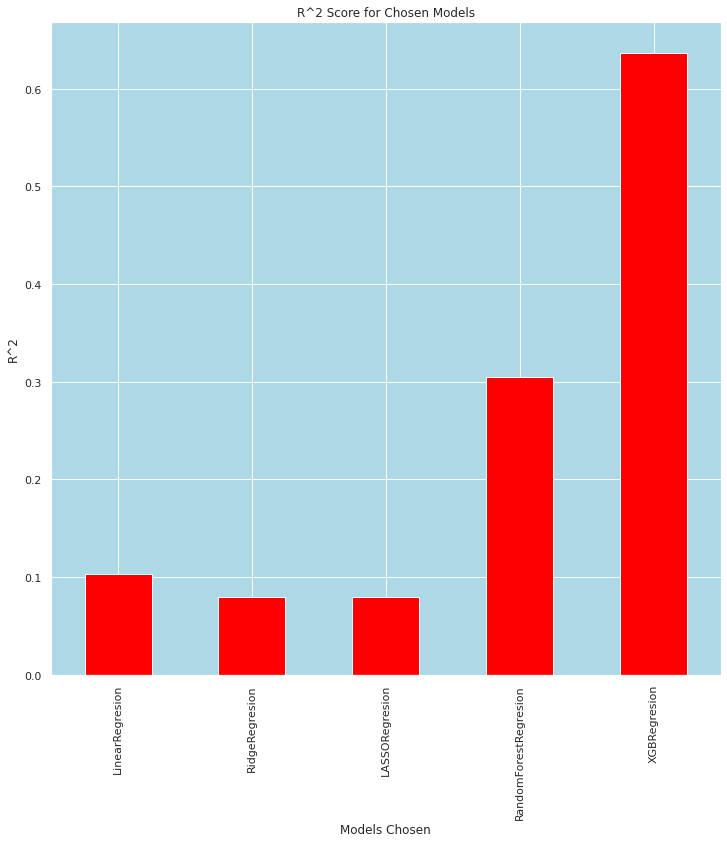

In [117]:
fig, ax = plt.subplots(figsize=(12,12))
pd_metrics['Test R^2'].plot(kind='bar', ax=ax, color='red')
ax.set_title('R^2 Score for Chosen Models')
ax.set_ylabel('R^2')
ax.set_xlabel('Models Chosen')

Text(0.5, 0, 'Models Chosen')

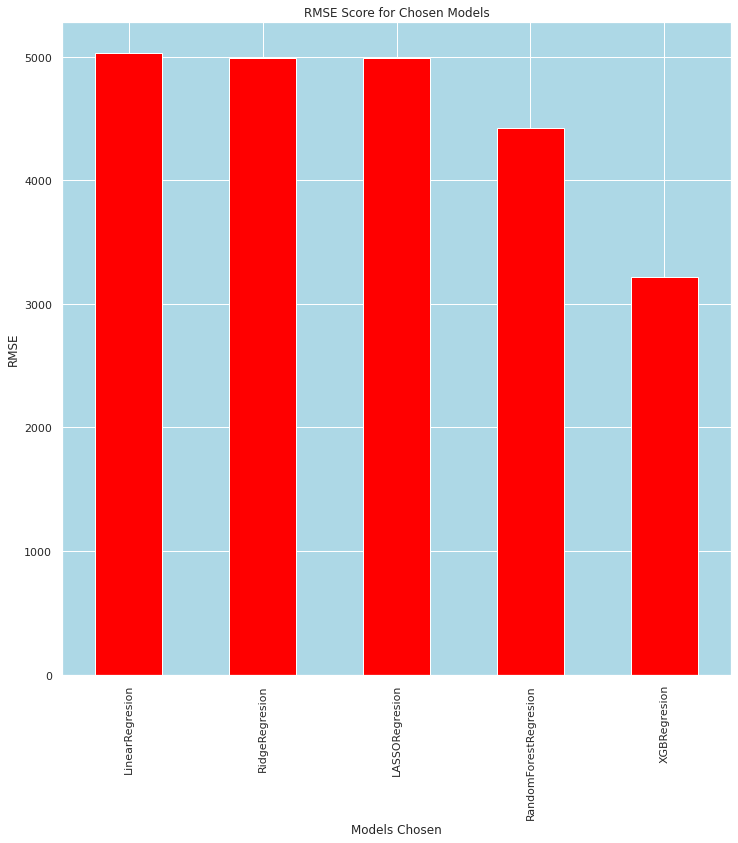

In [118]:
fig, ax = plt.subplots(figsize=(12,12))
pd_metrics['Test RMSE'].plot(kind='bar', ax=ax, color='red')
ax.set_title('RMSE Score for Chosen Models')
ax.set_ylabel('RMSE')
ax.set_xlabel('Models Chosen')

In [119]:
pred = pd.DataFrame(pred, columns=['load_shortfall_3h'])
pred.head()

,load_shortfall_3h
0,12719.666992
1,12668.543945
2,10351.922852
3,16325.959961
4,14298.874023


In [123]:
df_test['load_shortfall_3h'] = pred
submission = df_test[['time', 'load_shortfall_3h']]
submission.to_csv('xgb_submission.csv')
submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,12719.666992
1,2018-01-01 03:00:00,12668.543945
2,2018-01-01 06:00:00,10351.922852
3,2018-01-01 09:00:00,16325.959961
4,2018-01-01 12:00:00,14298.874023


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

From what we have witnessed from the models above. It seems a model the best predicts the test data is the xgboost regression model. This shown by the it having the highest R2 score of all the models. It does however show a bit of overfit for the train data, that can be caused by the hyperparameters that were tuned into the model which searching for the nost accurate prediction.And also it did provide us with the lowest RMSE score on Kaggle. For those reasons we chose to build our API based on it.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

XGboost is simply the shorter way of saying Extreme Gradient Boosting. it is a scaleable, distributed gradient boosted decision tree, that is to say . What makes it so efficient at regression models is it speciality of including linear model solver and tree learning algorithms. again these might feel a bit confusing, it simply means that when we ask our model to predict an outcome based off a certain dataset we use to train it. It solves the problem by creating tree like structures to explore possible possible correct predictions. This happenes simaltaneously with the model running continuous response variables as a result of one or more predictor variables.